<h1 style="text-align: center;">Pengenalan Pustaka Pandas</h1>

# Persiapan

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 100

In [7]:
mpl.style.use("dark_background")

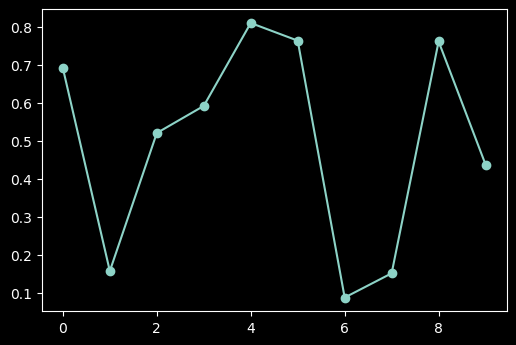

In [9]:
plt.clf()
plt.plot(np.random.rand(10), marker="o")

In [11]:
import pandas as pd

# Objek dasar Pandas

Terdapat tiga objek dasar Pandas yaitu:
- `Series`
- `DataFrame`
- `Index`

## Objek `Series` pada Pandas

`Series` adalah array 1d dari suatu data dengan indeks.

`Series` dapat dibuat dari suatu `list`:

In [13]:
s1 = pd.Series([0.5, 0.6, 0.4, 0.8, 0.76])
s1

0    0.50
1    0.60
2    0.40
3    0.80
4    0.76
dtype: float64

In [14]:
s2 = pd.Series(np.random.rand(5))
s2

0    0.289330
1    0.182191
2    0.543418
3    0.027533
4    0.883827
dtype: float64

`Series` terdiri dari barisan (*sequence*) nilai dan indeks yang dapat diakses dengan atribut `values` dan `index`.

Atribut `values` adalah objek array NumPy:

In [15]:
s1.values

array([0.5 , 0.6 , 0.4 , 0.8 , 0.76])

Sedangkan atribut `index` objek yang mirip array dengan tipe `pd.Index`.

In [16]:
s1.index

RangeIndex(start=0, stop=5, step=1)

In [17]:
type(s1.index)

pandas.core.indexes.range.RangeIndex

### `Series` sebagai generalisasi dari array `NumPy`

Data pada `Series` dapat diakses seperti pada array atau `list` dengan menggunakan operator kurung siku.

In [18]:
s1[2]

0.4

In [19]:
s2[1:3]

1    0.182191
2    0.543418
dtype: float64

Series memiliki banyak kemiripan dengan array NumPy. Perbedaannya adalah indeks pada array NumPy didefinisikan secara *implisit* sedangkan pada `Series` indeks didefinisikan secara *eksplisit* didefinisikan.

Indeks pada `Series` tidak harus berupa integer.

In [21]:
s1 = pd.Series([0.5, 0.6, 0.4, 0.8, 0.76], index=["a", "b", "c", "d", "e"])
s1

a    0.50
b    0.60
c    0.40
d    0.80
e    0.76
dtype: float64

In [22]:
s1["a"]

0.5

In [24]:
s1[["b", "c"]]

b    0.6
c    0.4
dtype: float64

Indeks pada `Series` tidak harus berurutan (untuk kasus indeks integer):

In [25]:
s1 = pd.Series([0.5, 0.6, 0.4, 0.8, 0.76], index=[3, 5, 7, 1, 4])
s1

3    0.50
5    0.60
7    0.40
1    0.80
4    0.76
dtype: float64

### `Series` sebagai spesialisasi dari `dict`

In [27]:
populasi_dict = {
    "Banten" : 12448200,
    "DKI Jakarta" : 10374200,
    "Jawa Barat" : 48037600,
    "Jawa Tengah" : 34257900,
    "Jawa Timur" : 39293000,
}
populasi = pd.Series(populasi_dict)
populasi

Banten         12448200
DKI Jakarta    10374200
Jawa Barat     48037600
Jawa Tengah    34257900
Jawa Timur     39293000
dtype: int64

In [28]:
populasi["DKI Jakarta"]

10374200

In [29]:
populasi["DKI Jakarta":"Jawa Timur"]

DKI Jakarta    10374200
Jawa Barat     48037600
Jawa Tengah    34257900
Jawa Timur     39293000
dtype: int64

### Mengkonstruksi objek `Series`

Sintaks umum:
```
pd.Series(data, index=index)
```
di mana `index` adalah argumen opsional dan data
dapat berupa banyak objek.

Contoh `data` berupa list atau NumPy array dan `index` default berupa urutan integer:

In [32]:
pd.Series([2,4,5])

0    2
1    4
2    5
dtype: int64

Data skalar, `index` diberikan:

In [33]:
pd.Series(123, index=[100, 200, 300])

100    123
200    123
300    123
dtype: int64

`data` berupa `dict`, `index` diambil dari kunci `dict`:

In [34]:
pd.Series( {2: "Jojo", 1: "Joyo", 3: "Joko"} )

2    Jojo
1    Joyo
3    Joko
dtype: object

Hanya indeks tertentu yang digunakan:

In [36]:
pd.Series( {2: "Jojo", 1: "Joyo", 3: "Joko"}, index=[3,2] )

3    Joko
2    Jojo
dtype: object

In [37]:
pd.Series( {2: "Jojo", 1: "Joyo", 3: "Joko"}, index=[2,3] )

2    Jojo
3    Joko
dtype: object

## Objek `DataFrame`

In [39]:
luas_dict = {
    "Banten" : 9662.92,
    "DKI Jakarta" : 664.01,
    "Jawa Barat" : 35377.76,
    "Jawa Tengah" : 32800.69,
    "Jawa Timur" : 47799.75
}
luas = pd.Series(luas_dict)
luas

Banten          9662.92
DKI Jakarta      664.01
Jawa Barat     35377.76
Jawa Tengah    32800.69
Jawa Timur     47799.75
dtype: float64

In [41]:
provinsi = pd.DataFrame({"populasi" : populasi, "luas" : luas})
provinsi

,populasi,luas
Banten,12448200,9662.92
DKI Jakarta,10374200,664.01
Jawa Barat,48037600,35377.76
Jawa Tengah,34257900,32800.69
Jawa Timur,39293000,47799.75


In [42]:
provinsi.index

Index(['Banten', 'DKI Jakarta', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur'], dtype='object')

In [43]:
provinsi.columns

Index(['populasi', 'luas'], dtype='object')

### DataFrame sebagai dict khusus

In [44]:
provinsi["luas"]

Banten          9662.92
DKI Jakarta      664.01
Jawa Barat     35377.76
Jawa Tengah    32800.69
Jawa Timur     47799.75
Name: luas, dtype: float64

In [45]:
provinsi["luas"]["Banten"]

9662.92

In [46]:
pd.DataFrame(provinsi["luas"])

,luas
Banten,9662.92
DKI Jakarta,664.01
Jawa Barat,35377.76
Jawa Tengah,32800.69
Jawa Timur,47799.75


In [47]:
data = [{'a': i, 'b': 2 * i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [48]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0
